In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_bvp

In [3]:
def sirIvp(y,t):
    """Compute right hand side of SIR model     
    Parameters:
        y ((3, ) ndarray): A vector representing susceptible, infected
            and the removed populations at time t.
        t (float): Current time.
        
    Returns:
        (threeple): A threeple corresponding to right hand side of the SIR model.
    """
    ds = -b*y[1]*y[0]
    di = b*y[1]*y[0]-g*y[1]
    dr = g*y[1]
    return (ds,di,dr)

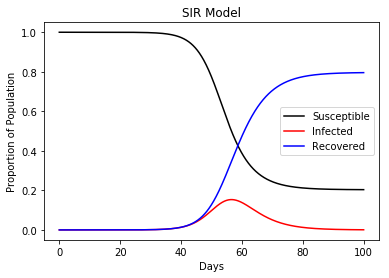

In [4]:
#choose the time length and plug it into the ode solver
b,g = 1/2,1/4
t = np.linspace(0,100,1000)
solution = odeint(sirIvp,[1-6.25*10**-7,6.25*10**-7,0],t)
#plot the solution
plt.title("SIR Model")
plt.ylabel("Proportion of Population")
plt.xlabel("Days")
plt.plot(t,solution[:,0],'k-',label='Susceptible')
plt.plot(t,solution[:,1],'r-',label='Infected')
plt.plot(t,solution[:,2],'b-',label='Recovered')
plt.legend(loc='best')
plt.show()

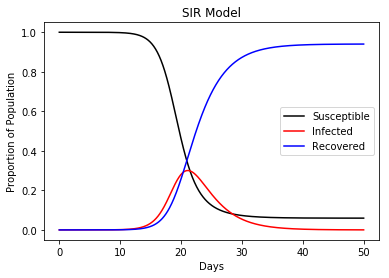

Number of people still able to work at height of infection:
2098619


In [5]:
b,g = 1,1/3
pop = 3*10**6
#choose the time length and plug it into the ode solver
t = np.linspace(0,50,1000)
solution = odeint(sirIvp,[1-5/pop,5/pop,0],t)
#plot the solution
plt.title("SIR Model")
plt.ylabel("Proportion of Population")
plt.xlabel("Days")
plt.plot(t,solution[:,0],'k-',label='Susceptible')
plt.plot(t,solution[:,1],'r-',label='Infected')
plt.plot(t,solution[:,2],'b-',label='Recovered')
plt.legend(loc='best')
plt.show()
#get the time index of when the infection is at its maximum
i = np.where(solution[:,1] == max(solution[:,1]))[0][0]
#add susceptible & recovered people at that time 
#converting it out of a fraction
print('Number of people still able to work at height of infection:')
print(int((solution[i,0]+solution[i,2])*pop))

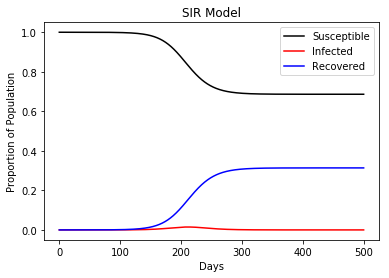

Number of people still able to work at height of infection:
2955799


In [6]:
b,g = 0.3,1/4
pop = 3*10**6
#choose the time length and plug it into the ode solver
t = np.linspace(0,500,1000)
solution = odeint(sirIvp,[1-5/pop,5/pop,0],t)
#plot the solution
plt.title("SIR Model")
plt.ylabel("Proportion of Population")
plt.xlabel("Days")
plt.plot(t,solution[:,0],'k-',label='Susceptible')
plt.plot(t,solution[:,1],'r-',label='Infected')
plt.plot(t,solution[:,2],'b-',label='Recovered')
plt.legend(loc='best')
plt.show()
#get the time index of when the infection is at its maximum
i = np.where(solution[:,1] == max(solution[:,1]))[0][0]
#add susceptible & recovered people at that time 
#converting it out of a fraction
print('Number of people still able to work at height of infection:')
print(int((solution[i,0]+solution[i,2])*pop))

In [7]:
def sirsIvp(y,t):
    """Compute right hand side of SIRS model     
    Parameters:
        y ((3, ) ndarray): A vector representing susceptible, infected
            and the removed populations at time t.
        t (float): Current time.
        
    Returns:
        (threeple): A threeple corresponding to right hand side of the 
            SIRS model.
    """
    ds = f*y[2]+m*(1-y[0])-b*y[1]*y[0]
    di = b*y[1]*y[0]-(g+m)*y[1]
    dr = g*y[1] - (m+f)*y[2]
    return (ds,di,dr)

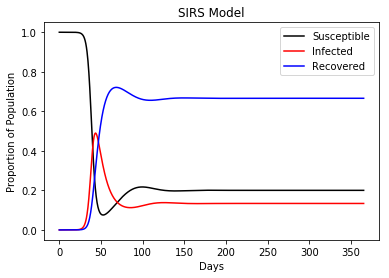

In [8]:
pop = 7*10**9
infpop = 1000
b,g,m,f = 1/2, 1/10, 0.0001, 1/50
#choose the time length and plug it into the ode solver
t = np.linspace(0,365,1000)
solution = odeint(sirsIvp,[1-infpop/pop,infpop/pop,0],t)
#plot the solution
plt.title("SIRS Model")
plt.ylabel("Proportion of Population")
plt.xlabel("Days")
plt.plot(t,solution[:,0],'k-',label='Susceptible')
plt.plot(t,solution[:,1],'r-',label='Infected')
plt.plot(t,solution[:,2],'b-',label='Recovered')
plt.legend(loc='best')
plt.show()

In [103]:
def seirIvp(t,y):
    """Compute right hand side of SIRS model     
    Parameters:
        y ((3, ) ndarray): A vector representing susceptible, infected
            and the exposed populations at time t.
        t (float): Current time.
        
    Returns:
        (6,ndarray): corresponding to right hand side of the 
            SIRS model.
    """
    ds = m*np.ones_like(y[0]) - beta(t)*y[1]*y[0]
    de = beta(t)*y[1]*y[0] - y[2]/l
    di = y[2]/l - y[1]/n
    result = np.array([ds,de,di,np.zeros_like(ds),np.zeros_like(de),np.zeros_like(di)])
    return result

def beta(t):
    """Returns the given beta function at time t"""
    return b0*(1+b1*np.cos(2*np.pi*t))

def bcs(ya,yb):
    return np.hstack([ya[:3]-ya[3:],yb[:3]-yb[3:]])

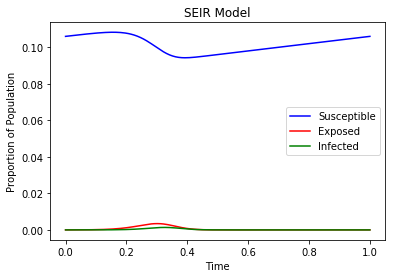

In [112]:
b0,b1 = 1575, 1
n,l,m = 0.01, 0.0279, 0.02
#choose the time length and plug it into the ode solver
t = np.linspace(0,1,200)
y = 0.1*np.ones((6,len(t)))
solution = solve_bvp(seirIvp,bcs,t,y)
#it's a scipy object, so get what we want
solution = solution.sol(t)
#plot the solution
plt.title("SEIR Model")
plt.ylabel("Proportion of Population")
plt.xlabel("Time")
#plot the solutions!
plt.plot(t,solution[0],'b-',label='Susceptible')
plt.plot(t,solution[2],'r-',label='Exposed')
plt.plot(t,solution[1],'g-',label='Infected')

plt.legend(loc='best')
plt.show()